Chloe Chen
Updated: 2/28/2023


### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *

### Connect to MySQL Database

In [30]:
from connection import *

con = connect()

Connection Successful


In [3]:
# test query as a string
query = "show databases;"
SQL(query, con)

,Database
0,information_schema
1,constant_therapy
2,ct_customer


In [4]:
# test query as a file
query = "test.sql"
SQL(query, con)

,Database
0,information_schema
1,constant_therapy
2,ct_customer


### Context

In [5]:
## basic info, takes about 30 secs to load, filtered preliminary
query = "context_query.sql"
context_df = SQL(query, con)

In [6]:
context_df.drop_duplicates()
context_df.head()

,id,condition_since,age_group,birth_year,deficit_id,disorder_id
0,2947,10y,22-50,NaN,5,1
1,2947,10y,22-50,NaN,6,1
2,2947,10y,22-50,NaN,7,1
3,2947,10y,22-50,NaN,8,1
4,3377,2y,51-70,NaN,1,3


In [7]:
## print out basic information
print("Number of patients: ", len(pd.unique(context_df["id"])))
print("Age groups: ", pd.unique(context_df["age_group"]))
print("disorders: ", pd.unique(context_df["disorder_id"])) ## potentially filter out more diseases
print("deficits: ", pd.unique(context_df["deficit_id"])) ## potentially filter out more deficits

Number of patients:  122676
Age groups:  ['22-50' '51-70' '>70' '6-12' '13-21' None]
disorders:  [ 1  3  5  4  2  6  9  7  8 10 11]
deficits:  [ 5  6  7  8  1  2  3  4  9 10]


In [8]:
context_df.nunique()

id                 122676
condition_since         9
age_group               5
birth_year            128
deficit_id             10
disorder_id            11
dtype: int64

In [9]:
context_df["disorder_id"].value_counts()

disorder_id
2     290745
3     210436
9     155004
1     154955
8     126359
5     115335
7      60135
6      49215
10     18224
4      17055
11      1390
Name: count, dtype: int64

In [10]:
context_df_disorder = context_df.groupby(["id"])["disorder_id"].apply(set).reset_index()
context_df_disorder.head()

,id,disorder_id
0,2947,{1}
1,3377,{3}
2,3509,"{1, 3}"
3,4575,{3}
4,5045,{3}


In [11]:
context_df_disorder = context_df_disorder.explode("disorder_id")
context_df_disorder.head()

,id,disorder_id
0,2947,1
1,3377,3
2,3509,1
2,3509,3
3,4575,3


<Axes: xlabel='disorder_id', ylabel='Count'>

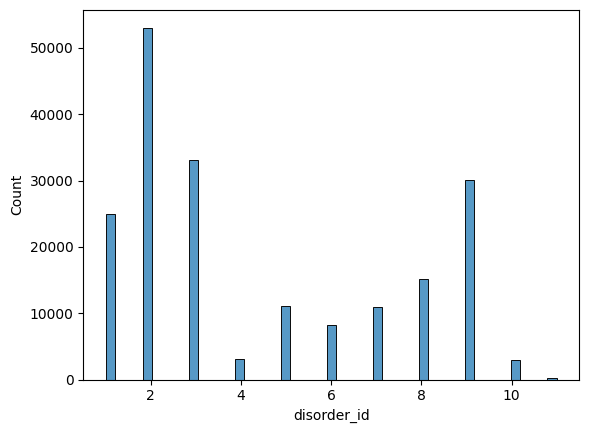

In [12]:
sns.histplot(data=context_df_disorder, x="disorder_id")

In [13]:
context_df_deficit = context_df.groupby(["id"])["deficit_id"].apply(set).reset_index()
context_df_deficit.head()

,id,deficit_id
0,2947,"{8, 5, 6, 7}"
1,3377,"{1, 2, 3, 4, 5, 6, 7, 8}"
2,3509,"{8, 2, 6}"
3,4575,"{1, 2, 3, 4, 5, 6, 8}"
4,5045,"{1, 2, 3, 4, 5, 6, 7, 8}"


In [14]:
context_df_deficit = context_df_deficit.explode("deficit_id")
context_df_deficit.head()

,id,deficit_id
0,2947,8
0,2947,5
0,2947,6
0,2947,7
1,3377,1


<Axes: xlabel='deficit_id', ylabel='Count'>

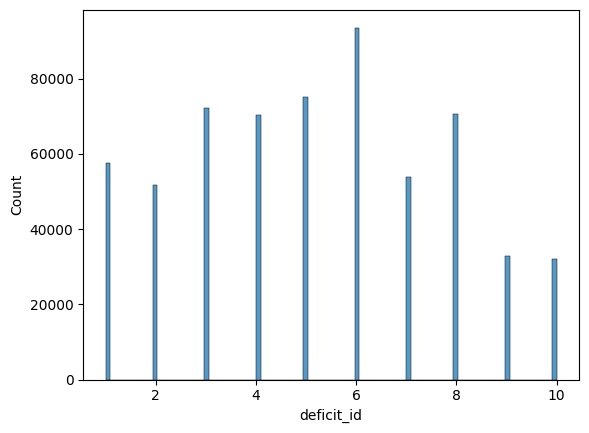

In [15]:
sns.histplot(data=context_df_deficit, x="deficit_id")

In [16]:
context_df["condition_since"] = context_df["condition_since"].apply(time_convert)

In [17]:
context_df.head()

,id,condition_since,age_group,birth_year,deficit_id,disorder_id
0,2947,120,22-50,NaN,5,1
1,2947,120,22-50,NaN,6,1
2,2947,120,22-50,NaN,7,1
3,2947,120,22-50,NaN,8,1
4,3377,24,51-70,NaN,1,3


In [18]:
context_df_time = context_df.drop_duplicates(subset="id")
context_df_time.head()

,id,condition_since,age_group,birth_year,deficit_id,disorder_id
0,2947,120,22-50,NaN,5,1
4,3377,24,51-70,NaN,1,3
12,3509,60,>70,NaN,2,1
18,4575,24,22-50,NaN,1,3
25,5045,24,51-70,NaN,1,3


In [19]:
print("Average time since onset: ", context_df_time["condition_since"].mean(), "month")
print("Median time since onset: ", context_df_time["condition_since"].median(), "month")
print("Mode of time since onset: ", context_df_time["condition_since"].mode(), "month")
print("Standard Deviation: ", context_df_time["condition_since"].std(), "month")
print("Variance: ", context_df_time["condition_since"].var(), "month")

Average time since onset:  40.270688643255404 month
Median time since onset:  12.0 month
Mode of time since onset:  0    6
Name: condition_since, dtype: int64 month
Standard Deviation:  46.33821018103228 month
Variance:  2147.229722781524 month


<Axes: >

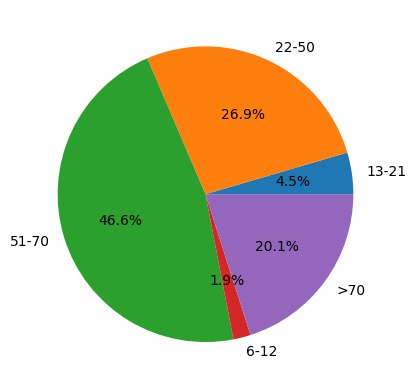

In [20]:
context_df_time.groupby("age_group").size().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='condition_since'>

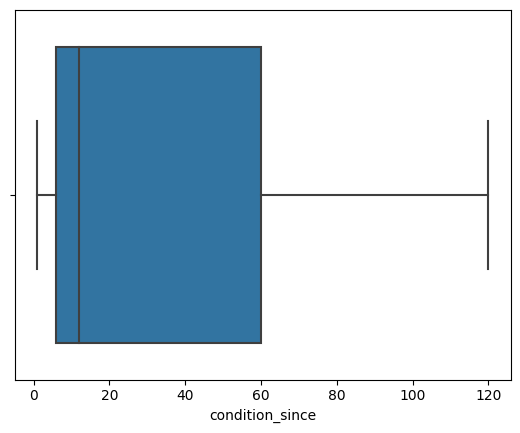

In [21]:
sns.boxplot(data=context_df_time, x="condition_since")

<Axes: xlabel='condition_since', ylabel='age_group'>

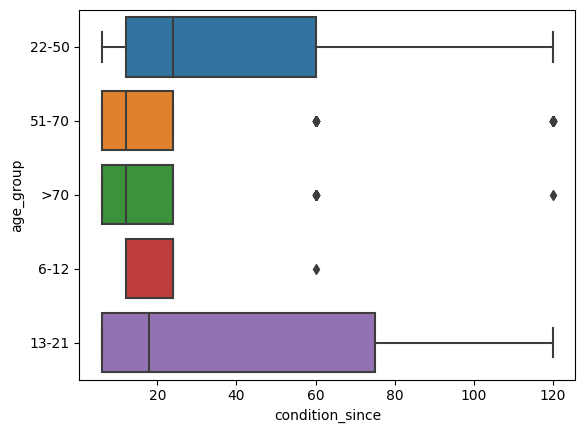

In [22]:
sns.boxplot(data=context_df_time, x="condition_since", y="age_group")

<Axes: xlabel='condition_since', ylabel='Count'>

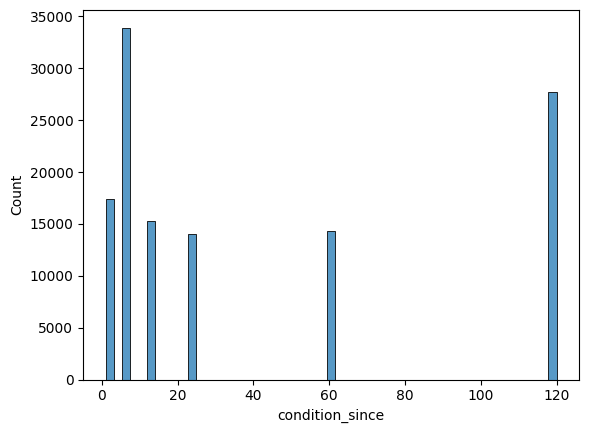

In [23]:
sns.histplot(data=context_df_time, x="condition_since")

In [24]:
# takes about 4 minutes to run

query = "select patient_id, completed_task_count from constant_therapy.sessions;"
task_count_data = SQL(query, con)
task_count_data.head()

,patient_id,completed_task_count
0,10,10.0
1,10,10.0
2,10,0.0
3,10,0.0
4,10,0.0


In [25]:
task_count_data = task_count_data.groupby("patient_id")["completed_task_count"].sum().reset_index()

In [26]:
task_count_data.head()

,patient_id,completed_task_count
0,10,10374.0
1,12,6822.0
2,13,7317.0
3,14,10076.0
4,15,5151.0


In [27]:
print(task_count_data["completed_task_count"].max())

517230.0


### Basic plots
using data that Claire used

In [31]:
# takes about 11 mins to run
query = """
select * from constant_therapy.q3;
"""
data = SQL(query, con)

In [32]:
data.nunique()

patient_id             32552
session_id           2538145
type                       1
parent_id             491158
schedule_id           299199
start_time              1375
start_time_min       2485544
end_time                1375
end_time_min         2398328
total_exercises           74
duration                6552
domain_id                 14
progression_order         37
task_type_id              93
task_level                12
accuracy                1088
latency                59053
dtype: int64

<Axes: >

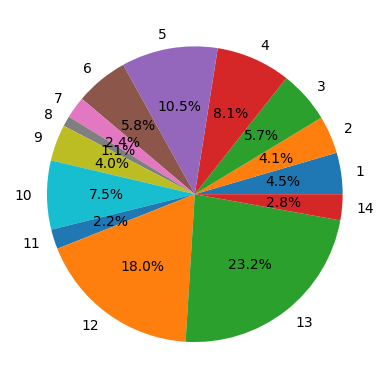

In [33]:
data.groupby("domain_id").size().plot.pie(autopct="%1.1f%%")

<Axes: >

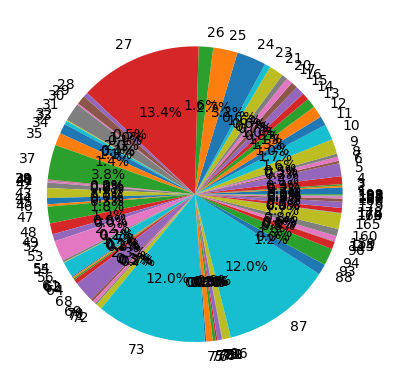

In [34]:
data.groupby("task_type_id").size().plot.pie(autopct="%1.1f%%")

In [37]:
# takes about 5 minutes
query = "select * from constant_therapy.before_after_v2;"
data = SQL(query, con)

In [38]:
data["acc_diff"] = data["after_accuracy_avg"] - data["before_accuracy_avg"]
data["acc_diff"].mean()

0.01632128142303705

In [39]:
data["lat_diff"] = data["after_log_latency_avg"] - data["before_log_latency_avg"]
data["lat_diff"].mean()

-0.13203832363196075

79.5330570392872


<Axes: xlabel='completed_task_count'>

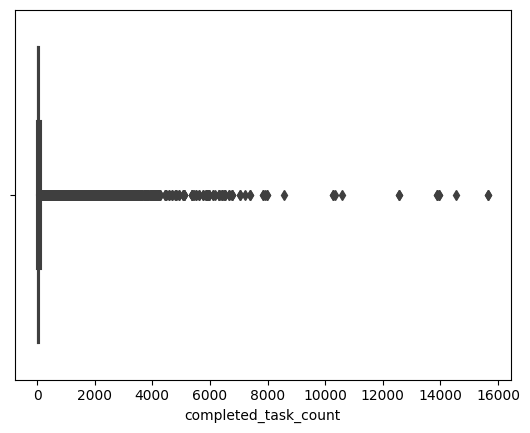

In [40]:
print(data["completed_task_count"].mean())
sns.boxplot(data = data, x = "completed_task_count")

<Axes: >

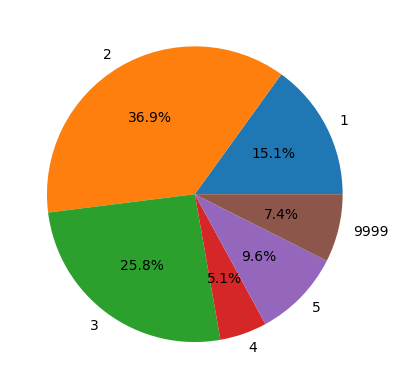

In [41]:
disorder_data = data.groupby("disorder_id")
disorder_data.size().plot.pie(autopct='%1.1f%%')